# 101 Pool Game Case Study

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

In [2]:
#Reading the dataset
df = pd.read_excel('Case Study - Data Set.xlsx')

In [3]:
#Creating a copy of the dataset
df1 = df.copy()

In [4]:
#Creating profile report of the dataset using pandas_profiling library
profile = ProfileReport(df1, title="Pandas Profiling Report")

In [5]:
# save the report as html file
profile.to_file(output_file="pandas_profiling.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 204.62it/s]


In [6]:
#Embedding the report in the notebook
profile.to_notebook_iframe()

##### Objectitve: Maximize Revenue and Increase User Engagement by optimizing Configuration(Entry Fee - Seats - Composition) Parameters.

##### Limitation: In order to optimize parameters, one should have a balanced approach rather than gravitating weightage to one end. Also Cut% (Revenue Parameter) can not be changed drastically.

##### Based on the EDA done using Python Profiling. Here are some findings:

> Entry Fee: Most Common Values are: 25 (11.4%), 100 (11.2%), 1000 (11.2%) 10 (10.6%) and 50 (10.6%)
> 
> Seat : 6 is around 80.4% while 2 is around 19.6%
> 
> Composition: 2 is most common with (36.7%) while 6 is least common (14%), 3 is 16.8%, 4 is 16.4% and 5 is 16%
> 
> Cut %: .15 is most common with 61.7% followed by 0.1 with 24.5%
> 
> 
> Rake: Most common is 1800 with 1.2% followed by 360 which is 1%
> 
> Wager: Most common is 3000 which is 1.2% followed by 6000 which is 1.1%

In [7]:
#Number of rows and columns in the dataset
df1.shape

(14161, 10)

In [8]:
#count missing values in each column
df1.isnull().sum()

Date                        0
Entry Fee                   0
Seat                        0
Composition                 0
Cut %                       0
# Users                     0
User Cash Game Count        0
Rake                        0
Wager                       0
Unnamed: 9              14161
dtype: int64

In [22]:
# Converting Date to datetime data type
df1['Date'] = pd.to_datetime(df1['Date'], infer_datetime_format=True)
df1['Month'] = df1['Date'].dt.month_name()
df1['Day'] = df1['Date'].dt.day
#name of the weekday
df1['Weekday_name'] = df1['Date'].dt.day_name()


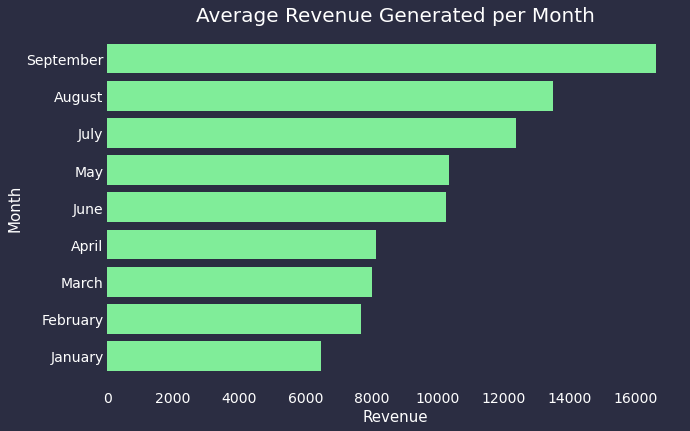

In [23]:
#unique users and revenue generated per month per composition
month = df1.groupby(['Month'])['Rake'].mean().round(2).sort_values(ascending=True)

#plotting the bar graph
fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('#2b2d42')
ax = fig.add_axes([0,0,1,1])

ax.set_facecolor('#2b2d42')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.barh(month.index, month.values, color='#80ed99')
plt.title('Average Revenue Generated per Month', fontsize = 20, color = 'white')

plt.xlabel('Revenue', fontsize = 15, color = 'white')
plt.ylabel('Month', fontsize = 15, color = 'white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.grid(False)
ax.grid(False)

plt.savefig('Average Revenue Generated per Month.png', facecolor='#2b2d42', bbox_inches='tight', pad_inches=0.2, dpi=300)




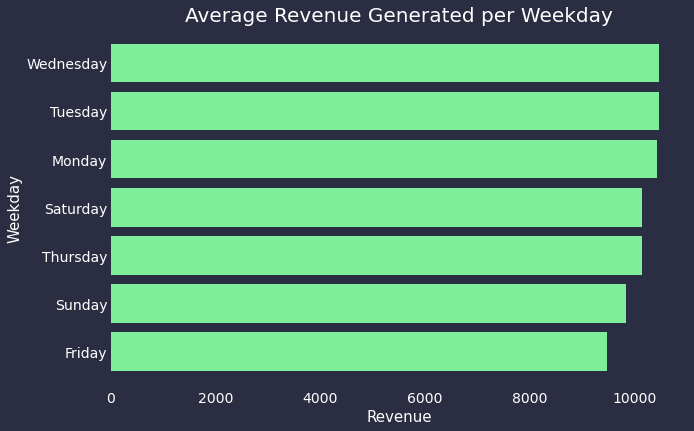

In [15]:
#unique users and revenue generated per weekday per composition
weekday = df1.groupby(['Weekday_name'])['Rake'].mean().round(2).sort_values(ascending=True)

#plotting the bar graph
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('#2b2d42')
ax = fig.add_axes([0,0,1,1])

ax.set_facecolor('#2b2d42')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.barh(weekday.index, weekday.values, color='#80ed99')
plt.title('Average Revenue Generated per Weekday', fontsize=20, color='white')

plt.xlabel('Revenue', fontsize=15, color='white')
plt.ylabel('Weekday', fontsize=15, color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.grid(False)
ax.grid(False)

plt.savefig('Average Revenue Generated per Weekday.png', facecolor='#2b2d42', bbox_inches='tight', pad_inches=0.2, dpi=300)

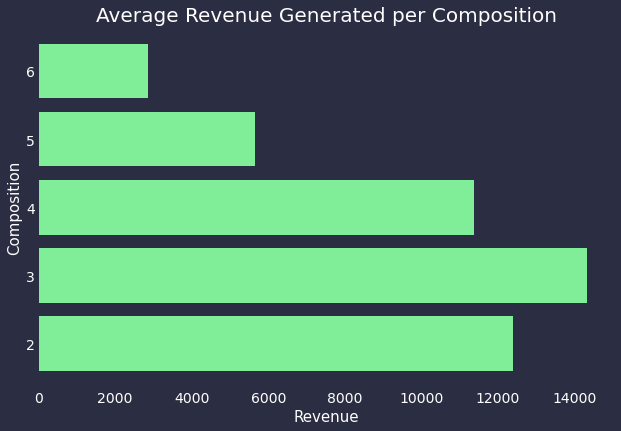

In [16]:
#unique users and revenue generated per weekday per composition
composition = df1.groupby(['Composition'])['Rake'].mean().round(2).sort_values(ascending=False)

#plotting the bar graph
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('#2b2d42')
ax = fig.add_axes([0,0,1,1])

ax.set_facecolor('#2b2d42')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.barh(composition.index, composition.values, color='#80ed99')
plt.title('Average Revenue Generated per Composition', fontsize=20, color='white')

plt.xlabel('Revenue', fontsize=15, color='white')
plt.ylabel('Composition', fontsize=15, color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.grid(False)
ax.grid(False)

plt.savefig('Average Revenue Generated per Composition.png', facecolor='#2b2d42', bbox_inches='tight', pad_inches=0.2, dpi=300)


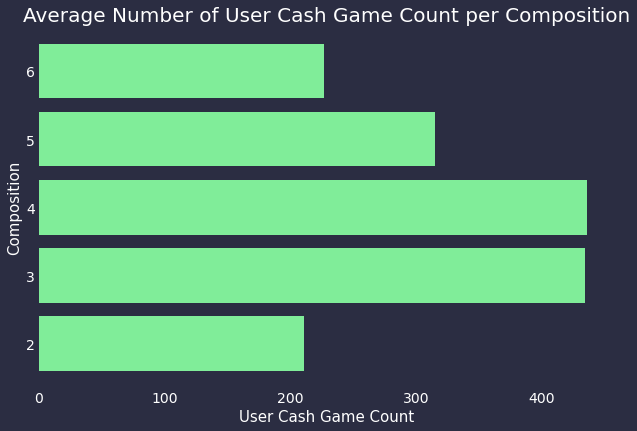

In [17]:
#Number of User Cash Game count per composition
Game = df1.groupby(['Composition'])['User Cash Game Count'].mean().round(2).sort_values(ascending=False)

#plotting the bar graph
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('#2b2d42')
ax = fig.add_axes([0,0,1,1])

ax.set_facecolor('#2b2d42')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.barh(Game.index, Game.values, color='#80ed99')
plt.title('Average Number of User Cash Game Count per Composition', fontsize=20, color='white')

plt.xlabel('User Cash Game Count', fontsize=15, color='white')
plt.ylabel('Composition', fontsize=15, color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.grid(False)
ax.grid(False)

plt.savefig('Average Number of User Cash Game Count per Composition.png', facecolor='#2b2d42', bbox_inches='tight', pad_inches=0.2, dpi=300)

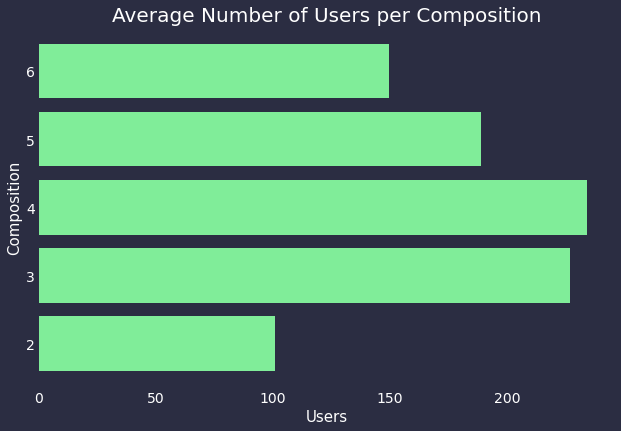

In [20]:
#Number of Users  per composition
Users = df1.groupby(['Composition'])['# Users'].mean().round(2).sort_values(ascending=False)

#plotting the bar graph
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('#2b2d42')
ax = fig.add_axes([0,0,1,1])

ax.set_facecolor('#2b2d42')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.barh(Users.index, Users.values, color='#80ed99')
plt.title('Average Number of Users per Composition', fontsize=20, color='white')

plt.xlabel('Users', fontsize=15, color='white')
plt.ylabel('Composition', fontsize=15, color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.grid(False)
ax.grid(False)

plt.savefig('Average Number of Users per Composition.png', facecolor='#2b2d42', bbox_inches='tight', pad_inches=0.2, dpi=300)

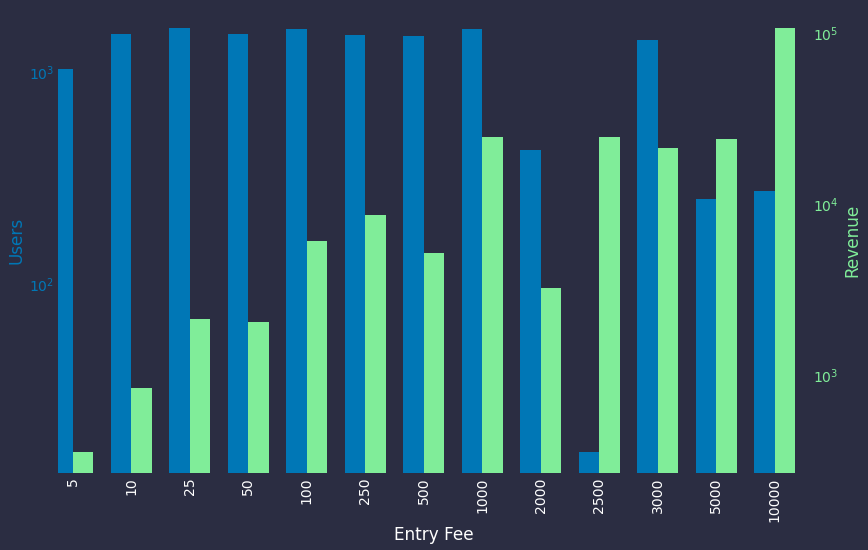

In [18]:

fig = plt.figure(figsize=(12,8))


fig.patch.set_facecolor('#2b2d42')

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 

width = 0.35
ax.set_facecolor('#2b2d42')
ax2.set_facecolor('#2b2d42')

df['Entry Fee'].value_counts().sort_index().plot(kind='bar', color='#0077b6', ax=ax, width=width, position=1)
df.groupby('Entry Fee').agg({'Rake':'mean'}).plot(kind='bar', color='#80ed99', ax=ax2, width=width, position=0)

ax.set_ylabel('Users',color='#0077b6')
ax2.set_ylabel('Revenue',color='#80ed99')

#legend off
ax2.legend().set_visible(False)

#spines off using for loop
for spine in ax.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

#scale both y axis
ax.set_yscale('log')
ax2.set_yscale('log')

#tick labels color
ax.tick_params(axis='y', colors='#0077b6')
ax2.tick_params(axis='y', colors='#80ed99')

#x-axis label color
ax.tick_params(axis='x', colors='white')

#X-axis label
ax.set_xlabel('Entry Fee', color='white')

ax.grid(False)
ax2.grid(False)

plt.savefig('Entry Fee vs Revenue.png', facecolor='#2b2d42', bbox_inches='tight', pad_inches=0.2, dpi=300)

### Modelling

In [14]:
#creating a list of unique compositions
composition = df1['Composition'].unique()

#creating a list of unique entry fees
entry_fee = df1['Entry Fee'].unique()

#creating a list of unique rake
rake = df1['Rake'].unique()

#creating a list of unique user cash game count
user_cash_game_count = df1['User Cash Game Count'].unique()